<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd

In [0]:
# first column is just its index so omit it in usecols parameter
person_df = pd.read_csv('https://raw.githubusercontent.com/ross-fisher/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', usecols=range(1,4))
person_df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


#### Confounding variables

I think that age would be a confounding variable in this dataset if you were interested in predicting weight. Children and the elderly might be expected to have different weights, and might be expected to have a different amount of exercise_time. Younger people should expect to maintain lower body weight with less exercise. Also, since obesity is associated with higher rates of mortality, you might expect to not have a different soft limit on weight at either end of the age spectrum.

In [0]:
weight_bins = pd.cut(person_df.weight, 4)
age_bins = pd.cut(person_df.age, 4)
exercise_bins = pd.cut(person_df.exercise_time, 3)

In [0]:
pd.crosstab(weight_bins, age_bins, normalize='columns')

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
weight,,,,
"(99.854, 136.5]",0.389408,0.442623,0.391304,0.288591
"(136.5, 173.0]",0.383178,0.304918,0.307971,0.322148
"(173.0, 209.5]",0.161994,0.196721,0.228261,0.261745
"(209.5, 246.0]",0.065421,0.055738,0.072464,0.127517


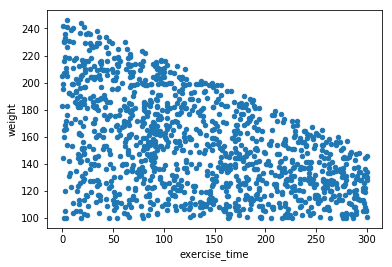

In [0]:
person_df.plot.scatter('exercise_time', 'weight')

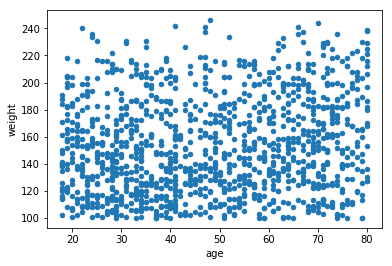

In [0]:
# it looks likethe most density shifts upwards over time around 40, and it seems to decrease with age.
# although the crosstab makes this easier to see you can see it here too. That might have
# less to do with age and possibly with a diet change or something. 
# Age seems to predict time exercising more than it does weight (very few old people work out the maximum amount
# of time) and that might better explain any correlations seen here than age itself. 
person_df.plot.scatter('age', 'weight')

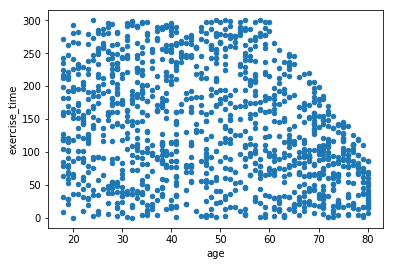

In [142]:
person_df.plot.scatter('age', 'exercise_time')

In [147]:
# indeed it looks like age predicts exercise time much better, 
# so maybe you could guess the exercise time if you needed to with weight
# then guess age

ct_exercise_age = pd.crosstab(exercise_bins, age_bins, normalize='columns')
ct_exercise_age

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
exercise_time,,,,
"(-0.3, 100.0]",0.314642,0.360656,0.355072,0.657718
"(100.0, 200.0]",0.355140,0.281967,0.326087,0.315436
"(200.0, 300.0]",0.330218,0.357377,0.318841,0.026846


In [146]:
ct_exercise = pd.crosstab(weight_bins, exercise_bins, normalize='columns')
ct_exercise

exercise_time,"(-0.3, 100.0]","(100.0, 200.0]","(200.0, 300.0]"
weight,,,
"(99.854, 136.5]",0.227723,0.377604,0.623794
"(136.5, 173.0]",0.287129,0.361979,0.363344
"(173.0, 209.5]",0.302970,0.250000,0.012862
"(209.5, 246.0]",0.182178,0.010417,0.000000


In [145]:
#pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')
ct = pd.crosstab(weight_bins, [age_bins, exercise_bins], normalize='columns')
# can see that hardly any old people exercise for the largest group of time
# seems that exercising reduces the likely range and makes it easier to predict weight. 
# so if a person exercises less it is less easy to predict their weight
ct

age             (17.938, 33.5]      ...         (64.5, 80.0]
exercise_time    (-0.3, 100.0]      ...       (200.0, 300.0]
weight                              ...                     
(99.854, 136.5]       0.207921      ...                0.625
(136.5, 173.0]        0.306931      ...                0.375
(173.0, 209.5]        0.297030      ...                0.000
(209.5, 246.0]        0.188119      ...                0.000

[4 rows x 12 columns]

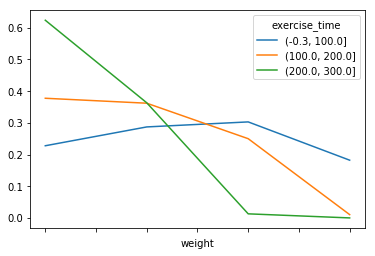

In [0]:
ct_exercise.plot()

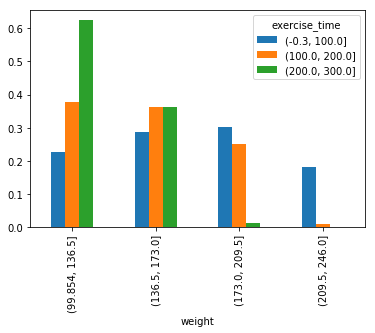

In [0]:
from matplotlib import cm
ct_exercise.plot(kind='bar')
# can imagine how exercise shifts the blue bar left
# and into a smaller area

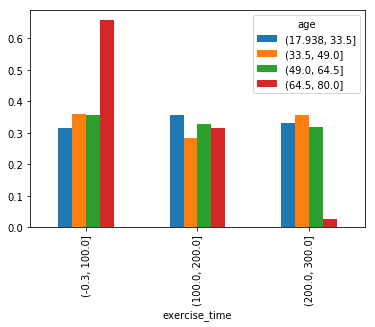

In [143]:
ct_exercise_age.plot(kind='bar')

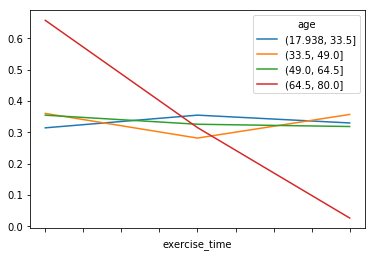

In [0]:
# see how exercise time takes a nosedive in old age, otherwise
# age doesn't seem to predict exercise time
ct_exercise_age.plot()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


####  What are the variable types in the data?

I think all the variables are discrete because they're all integers. They are also all ordinal meaning higher numbers for age, weight, and exercise_time represent a higher rank.

####  What are the relationships between the variables?

Exercise time and weight have a high correlation. Age and weight seems to be lowly correlated. Age has a confounding factor as people have distinct exercise habits at different ages and this will affect the distribution of weight depending on how inclusive your age range is.

####  Which relationships are "real", and which spurious?

The relationship between exercise_time and weight is real. Age and weight seem to have a spurious relationship.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)